In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Competition을 위한 데이터 처리 예제

- mem_data.csv 파일의 gender 열과 user_id열은 모델링에 사용됨에 따라 수정하시면 안됩니다.

In [2]:
mem_data = pd.read_csv('data/mem_data.csv')
mem_tr = pd.read_csv('data/transactions.csv')
song_info = pd.read_csv('data/songs.csv')
mem_tr = mem_tr.merge(song_info, how='left')

In [3]:
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12399 entries, 0 to 12398
Data columns (total 7 columns):
user_id       12399 non-null int64
city          12399 non-null int64
age           12399 non-null int64
reg_method    12399 non-null int64
reg_date      12399 non-null int64
ex_date       12399 non-null int64
gender        12399 non-null object
dtypes: int64(6), object(1)
memory usage: 678.1+ KB


## **[mem_data 처리]**

**[변수 처리 1]** 나이 이상치(outlier)제거

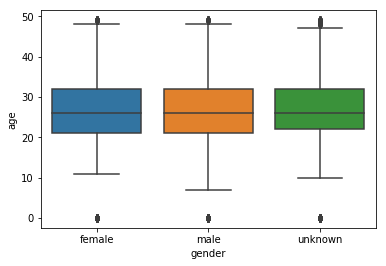

In [18]:
sns.boxplot(x='gender', y='age', data=mem_data);

In [19]:
Q1 = mem_data.age.quantile(0.25)
Q3 = mem_data.age.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
whisker = (mem_data.age >= (Q1 - 1.5 * IQR)) & (mem_data.age <= (Q3 + 1.5 * IQR))
mem_data.age = mem_data.age.where(whisker, other=0)

11.0


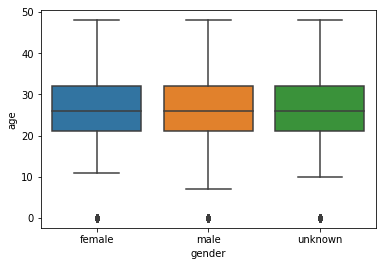

In [20]:
sns.boxplot(x='gender', y='age', data=mem_data)

In [14]:
len(mem_data)

12399

In [108]:
city_gender = mem_data.groupby(['city', 'gender']).agg({'user_id':['count']})

count
city gender        
1    female     228
     male       219
     unknown    200
10   female      67
     male        58
     unknown     45
11   female      84
     male        71
     unknown     59
12   female     114
     male       151
     unknown    121
13   female     926
     male       959
     unknown    809
14   female     190
     male       207
     unknown    163
15   female     405
     male       425
     unknown    375
16   female      10
     male        11
     unknown      7
17   female      30
     male        55
     unknown     36
18   female      74
     male        77
     unknown     65
...             ...
20   female       7
     male         7
     unknown     12
21   female      61
     male        55
     unknown     47
22   female     404
     male       440
     unknown    334
3    female      48
     male        60
     unknown     51
4    female     446
     male       477
     unknown    416
5    female     715
     male       713
     unknown    602
6    female     236
     male       269
     unknown    213
7    female      27
     male        28
     unknown     20
8    female      64
     male        91
     unknown     68
9    female      83
     male        78
     unknown     75

[63 rows x 1 columns]

In [3]:
mem_data['city'] = mem_data.city.astype(str)

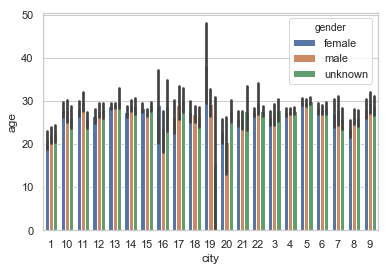

In [5]:
sns.set(style="whitegrid")
sns.barplot(x="city", hue="gender", y="age", data=mem_data);

In [10]:
sns.set(style="whitegrid")
sns.barplot(x="city", hue="age", y="" data=mem_data);

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
#pivot_df = mem_data.pivot(index='gender', columns='city', values='age')
#pivot_df
mem_data.loc[:,['city','gender', 'age']].plot.bar(stacked=True, figsize=(10,7));

In [23]:
df_pivot = mem_data.pivot_table(index='city', columns='gender', values='age')
df_pivot

gender,female,male,unknown
city,,,
1,20.938596,22.059361,22.540000
10,27.880597,27.586207,26.133333
11,28.083333,29.830986,25.508475
12,26.394737,27.735099,27.760331
13,28.769978,28.958290,29.990111
14,27.489474,28.937198,28.797546
15,28.370370,27.251765,28.736000
16,29.000000,23.636364,28.714286
17,26.300000,29.109091,30.166667


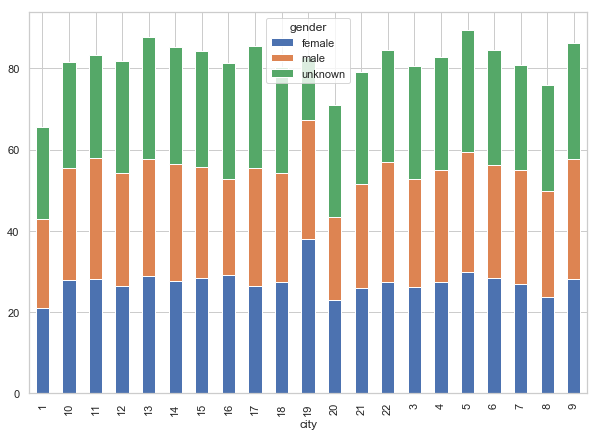

In [24]:
df_pivot.plot.bar(stacked=True, figsize=(10,7))

In [115]:
mem_data.head()

,user_id,city,age,reg_method,gender,R_DAY,E_DAY,total_listen,rec_ratio,rec_genre,like_artists
0,13827,14,29,9,female,1814,987,73,0.820225,5,54
1,6618,13,19,4,female,658,1015,58,0.542056,11,41
2,7615,22,33,9,female,4310,1113,26,0.541667,7,19
3,15535,13,48,9,female,2465,1110,83,0.846939,7,37
4,17708,18,20,4,female,729,1442,14,0.636364,3,11


In [122]:
mem_data.loc[mem_data['total_listen'] == 0, 'test'] =  0 
mem_data.loc[mem_data['total_listen'] != 0, 'test'] =  1

In [123]:
mem_data['test']

0        1
1        1
2        1
3        1
4        1
5        1
6        1
7        1
8        1
9        0
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
12369    1
12370    0
12371    1
12372    1
12373    1
12374    1
12375    1
12376    1
12377    1
12378    1
12379    1
12380    0
12381    1
12382    1
12383    1
12384    1
12385    1
12386    1
12387    1
12388    1
12389    1
12390    1
12391    1
12392    1
12393    1
12394    1
12395    1
12396    1
12397    1
12398    1
Name: test, Length: 12399, dtype: int64

**[변수 생성 1]** 등록 일자(reg_date)로부터 경과일 구하기

In [4]:
f = pd.to_datetime(mem_data.reg_date, format='%Y%m%d')
f = (pd.to_datetime('2017-12-31') - f).dt.days
mem_data['R_DAY'] = f
mem_data.R_DAY.describe()

count    12399.000000
mean      1996.676748
std       1207.874677
min        334.000000
25%        974.000000
50%       1821.000000
75%       2611.000000
max       5028.000000
Name: R_DAY, dtype: float64

**[변수 생성 2]** 만료 일자까지 일자구하기(ex_date)

In [5]:
f = pd.to_datetime(mem_data.ex_date, format='%Y%m%d')
f = (f.max() - f).dt.days
mem_data['E_DAY'] = f
mem_data.E_DAY.describe()

count    12399.000000
mean      1146.211711
std        213.843689
min          0.000000
25%       1106.000000
50%       1119.000000
75%       1159.000000
max       5845.000000
Name: E_DAY, dtype: float64

## **[다른 데이터와 연동하여 변수 생성]**

**[변수 생성 1]** 평균 재생 횟수 구하기

In [6]:
f = mem_tr.groupby('user_id')['listen'].agg({'total_listen':'sum'}).reindex().reset_index()
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0).astype('int')
mem_data.head()

C:\Users\south\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,user_id,city,age,reg_method,reg_date,ex_date,gender,R_DAY,E_DAY,total_listen
0,13827,14,29,9,20130112,20180203,female,1814,987,73
1,6618,13,19,4,20160313,20180106,female,658,1015,58
2,7615,22,33,9,20060314,20170930,female,4310,1113,26
3,15535,13,48,9,20110402,20171003,female,2465,1110,83
4,17708,18,20,4,20160102,20161105,female,729,1442,14


**[변수 생성 2]** 추천을 받아들인 횟수 구하기

In [7]:
f = mem_tr.groupby('user_id')['listen'].agg({'rec_ratio':'count'}).reindex().reset_index()
f = f.astype('int')
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0)
mem_data['rec_ratio'] = (mem_data['total_listen'] / mem_data['rec_ratio'].values).fillna(0).astype('float32')

C:\Users\south\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


**[변수 생성 3]** 추천된 장르 개수 구하기

In [8]:
f = mem_tr.groupby('user_id')['genre'].agg({'rec_genre':'nunique'}).reindex().reset_index()
f = f.astype('int')
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0).astype('int')

C:\Users\south\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


**[변수 생성 4]** 청취한 아티스트 수

In [9]:
f = mem_tr[mem_tr.listen==1].groupby('user_id')['artist'].agg({'like_artists':'nunique'}).reindex().reset_index()
f = f.astype('int')
mem_data = mem_data.merge(f, how='left')
mem_data.iloc[:,-1] = mem_data.iloc[:,-1].fillna(0).astype('int')

C:\Users\south\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


## **[최종 결과 저장]**

- mem_data에 최종 결과가 모일 수 있도록 준비
- 1.예측에 사용하지 않을 열들 drop
- 2.csv형태로 저장
- **주의사항1 : user_id열은 삭제하지 마세요. **
- user_id를 변수로 사용하기를 원하면 다른 열을 새로 생성해서 복사해서 사용하세요.
- 주의사항2 : gender열을 제외하고 문자열이 포함된 열이 데이터에 포함되지 않도록 한다.

In [10]:
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12399 entries, 0 to 12398
Data columns (total 13 columns):
user_id         12399 non-null int64
city            12399 non-null int64
age             12399 non-null int64
reg_method      12399 non-null int64
reg_date        12399 non-null int64
ex_date         12399 non-null int64
gender          12399 non-null object
R_DAY           12399 non-null int64
E_DAY           12399 non-null int64
total_listen    12399 non-null int32
rec_ratio       12399 non-null float32
rec_genre       12399 non-null int32
like_artists    12399 non-null int32
dtypes: float32(1), int32(3), int64(8), object(1)
memory usage: 1.1+ MB


In [11]:
d_col = ['reg_date','ex_date']
mem_data = mem_data.drop(d_col, axis=1)
mem_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12399 entries, 0 to 12398
Data columns (total 11 columns):
user_id         12399 non-null int64
city            12399 non-null int64
age             12399 non-null int64
reg_method      12399 non-null int64
gender          12399 non-null object
R_DAY           12399 non-null int64
E_DAY           12399 non-null int64
total_listen    12399 non-null int32
rec_ratio       12399 non-null float32
rec_genre       12399 non-null int32
like_artists    12399 non-null int32
dtypes: float32(1), int32(3), int64(6), object(1)
memory usage: 968.7+ KB


In [12]:
graph_data = mem_data[mem_data.gender!='unknown'].drop('user_id', axis=1)

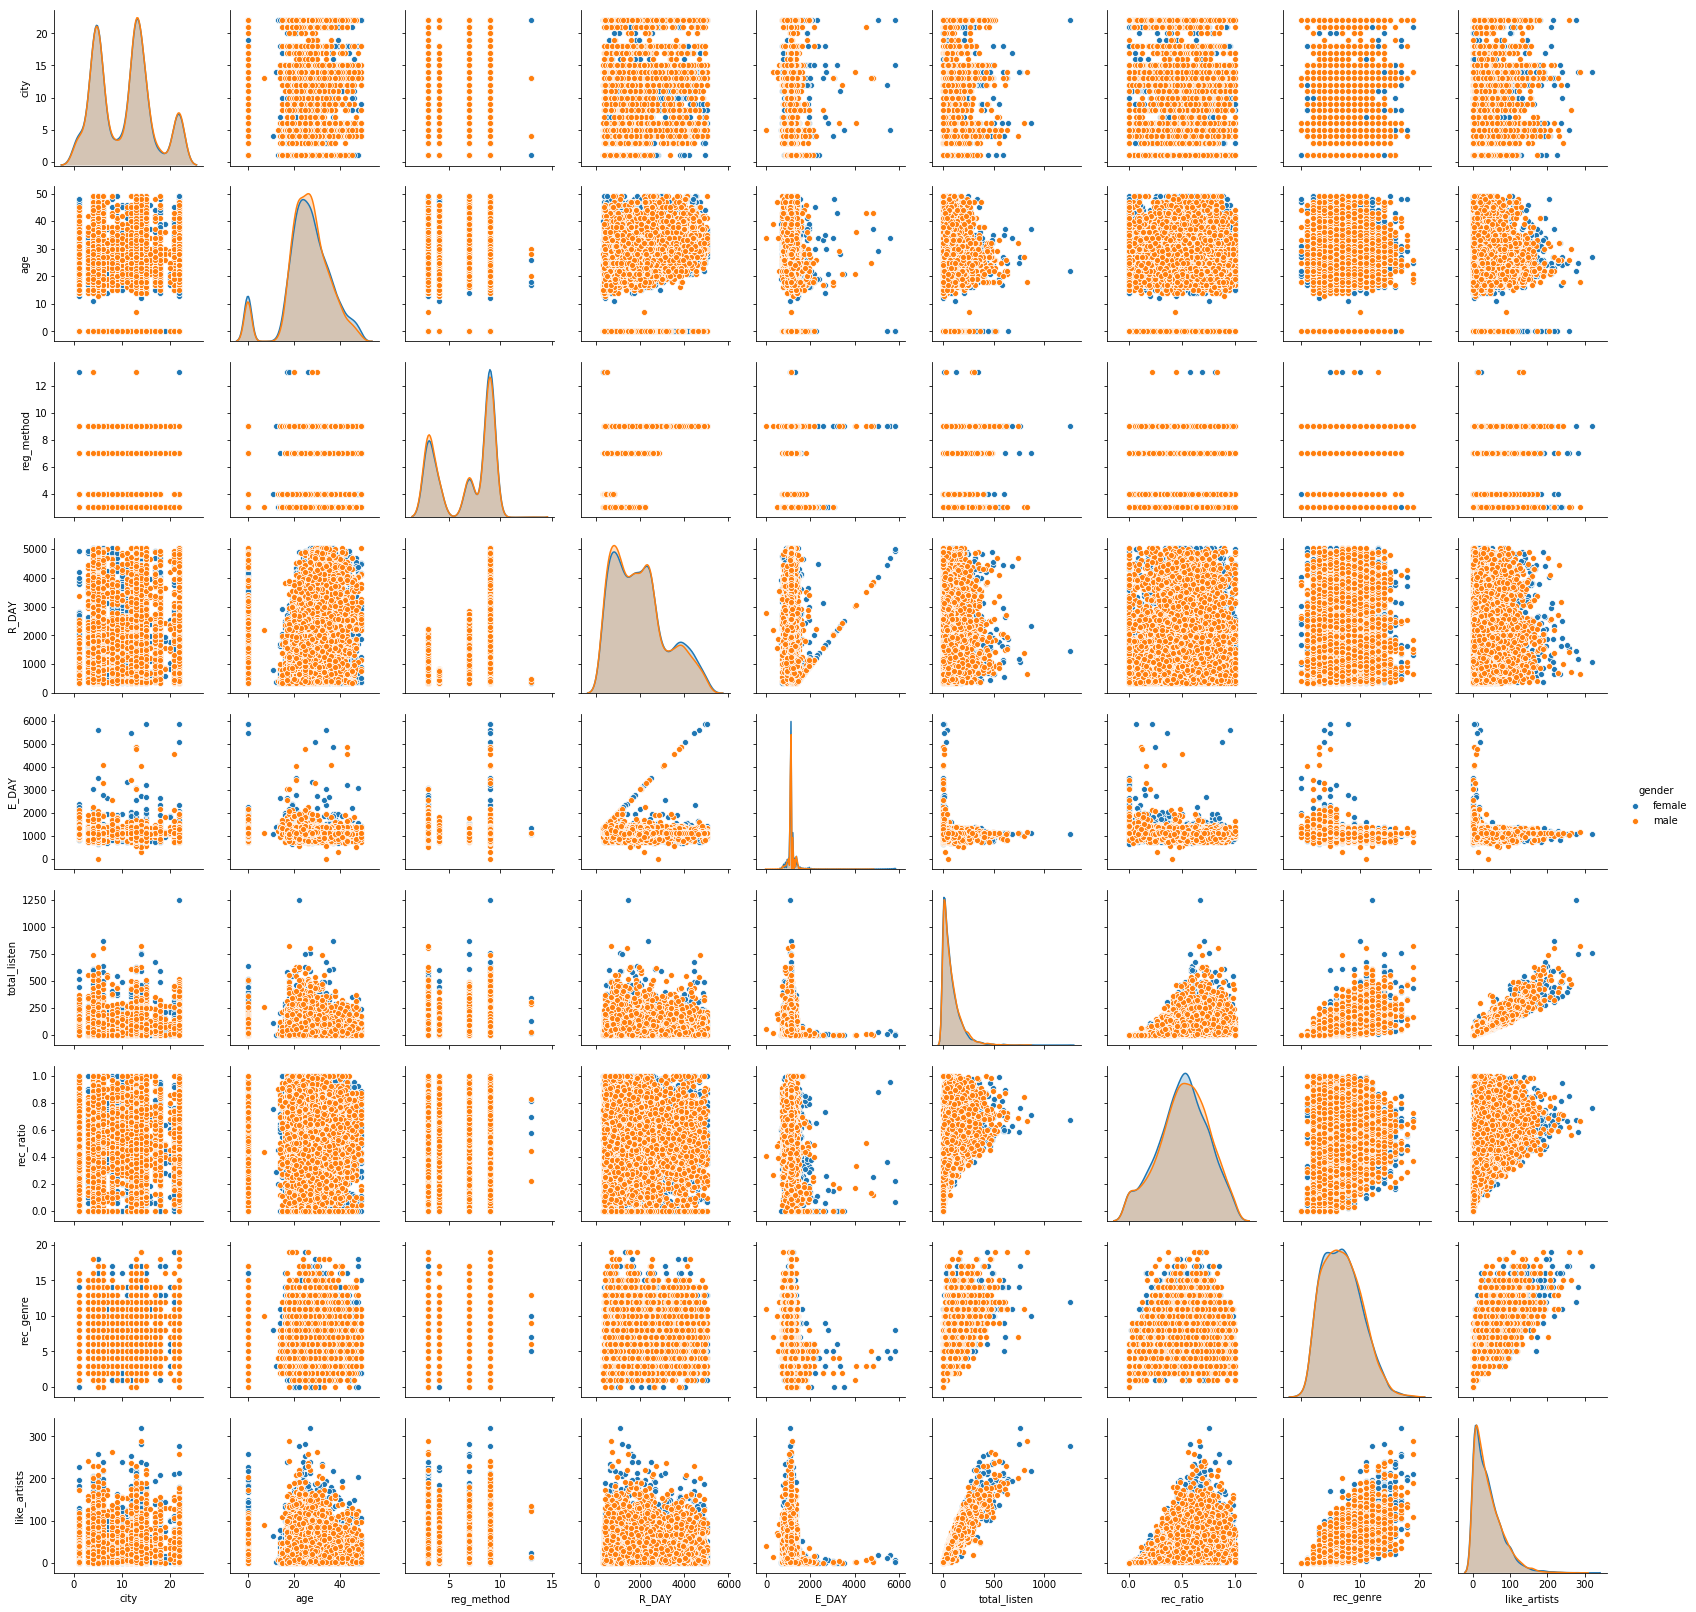

In [16]:
sns.pairplot(graph_data, hue='gender')

In [13]:
mem_data.to_csv('data/pre_data02.csv', index=False)